In [33]:
plt.savefig("popular_movies_chart.png")


<Figure size 640x480 with 0 Axes>

In [32]:
plt.savefig("genre_chart.png")


<Figure size 640x480 with 0 Axes>

In [31]:
movies.to_csv("clean_movies.csv", index=False)
ratings.to_csv("clean_ratings.csv", index=False)
merged_df.to_csv("merged_movie_data.csv", index=False)


In [26]:
top_genre_movies.head(20)


,title,average_rating,rating_count
551,Fight Club (1999),4.272936,218
374,"Dark Knight, The (2008)",4.238255,149
1255,"Princess Bride, The (1987)",4.232394,142
1505,Star Wars: Episode IV - A New Hope (1977),4.231076,251
92,Apocalypse Now (1979),4.219626,107
1506,Star Wars: Episode V - The Empire Strikes Back...,4.215640,211
1279,Raiders of the Lost Ark (Indiana Jones and the...,4.207500,200
1038,"Matrix, The (1999)",4.192446,278
1151,North by Northwest (1959),4.184211,57
311,City of God (Cidade de Deus) (2002),4.146667,75


In [25]:
top_genre_movies = genre_movies.groupby('title').agg(
    average_rating=('rating', 'mean'),
    rating_count=('rating', 'count')
).reset_index()

# Filter only movies with at least 50 ratings to avoid low-rating bias
top_genre_movies = top_genre_movies[top_genre_movies['rating_count'] >= 50]

# Sort highest rated first
top_genre_movies = top_genre_movies.sort_values(by='average_rating', ascending=False)

top_genre_movies.head(10)


,title,average_rating,rating_count
551,Fight Club (1999),4.272936,218
374,"Dark Knight, The (2008)",4.238255,149
1255,"Princess Bride, The (1987)",4.232394,142
1505,Star Wars: Episode IV - A New Hope (1977),4.231076,251
92,Apocalypse Now (1979),4.219626,107
1506,Star Wars: Episode V - The Empire Strikes Back...,4.215640,211
1279,Raiders of the Lost Ark (Indiana Jones and the...,4.207500,200
1038,"Matrix, The (1999)",4.192446,278
1151,North by Northwest (1959),4.184211,57
311,City of God (Cidade de Deus) (2002),4.146667,75


In [24]:
genre_movies = genre_df[genre_df['genres'] == genre_input]
genre_movies.head()


,userId,movieId,rating,timestamp,title,genres
2,1,6,4.0,964982224,Heat (1995),Action
5,1,70,3.0,964982400,From Dusk Till Dawn (1996),Action
7,1,110,4.0,964982176,Braveheart (1995),Action
8,1,151,5.0,964984041,Rob Roy (1995),Action
10,1,163,5.0,964983650,Desperado (1995),Action


In [23]:
genre_input = input("Enter a genre (e.g., Action, Comedy, Drama): ")
genre_input


Enter a genre (e.g., Action, Comedy, Drama): Action


'Action'

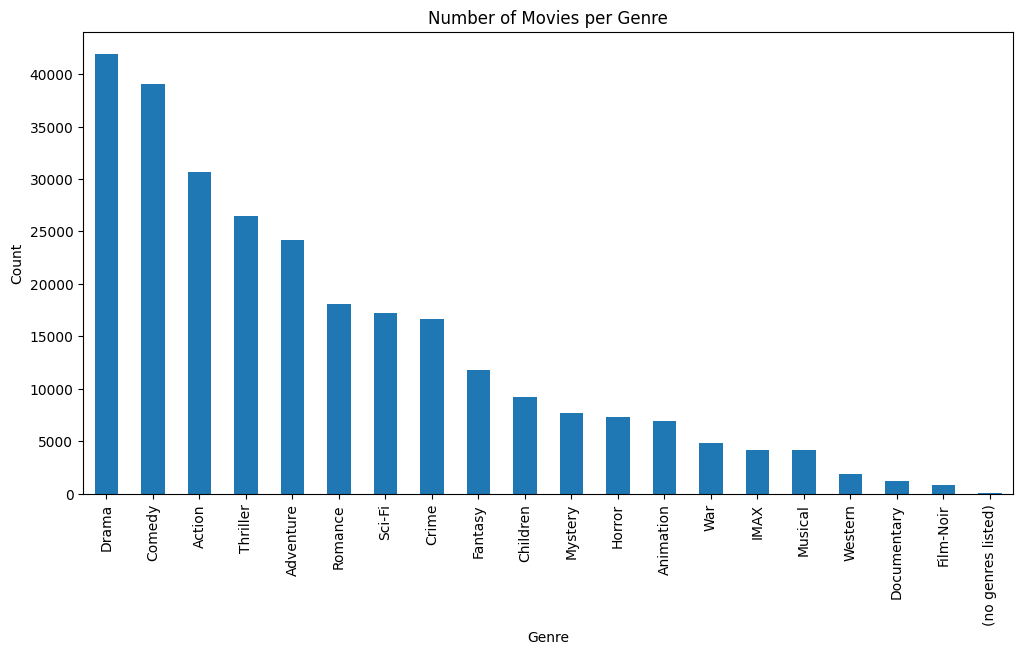

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
genre_counts.plot(kind='bar')
plt.title("Number of Movies per Genre")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()


In [21]:
genre_counts = genre_df['genres'].value_counts()
genre_counts


,count
genres,
Drama,41928
Comedy,39053
Action,30635
Thriller,26452
Adventure,24161
Romance,18124
Sci-Fi,17243
Crime,16681
Fantasy,11834


In [20]:
genre_df = merged_df.copy()
genre_df['genres'] = genre_df['genres'].str.split('|')
genre_df = genre_df.explode('genres')

genre_df.head()


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure
0,1,1,4.0,964982703,Toy Story (1995),Animation
0,1,1,4.0,964982703,Toy Story (1995),Children
0,1,1,4.0,964982703,Toy Story (1995),Comedy
0,1,1,4.0,964982703,Toy Story (1995),Fantasy


In [18]:
movie_stats = merged_df.groupby('title').agg(
    average_rating=('rating', 'mean'),
    rating_count=('rating', 'count')
).reset_index()

popular_movies = movie_stats[movie_stats['rating_count'] >= 50] \
                    .sort_values(by='average_rating', ascending=False)

popular_movies.head(10)


,title,average_rating,rating_count
7593,"Shawshank Redemption, The (1994)",4.429022,317
3499,"Godfather, The (1972)",4.289062,192
3011,Fight Club (1999),4.272936,218
1961,Cool Hand Luke (1967),4.271930,57
2531,Dr. Strangelove or: How I Learned to Stop Worr...,4.268041,97
6999,Rear Window (1954),4.261905,84
3500,"Godfather: Part II, The (1974)",4.259690,129
2334,"Departed, The (2006)",4.252336,107
3564,Goodfellas (1990),4.250000,126
1593,Casablanca (1942),4.240000,100


In [16]:
import pandas as pd

# Load the two CSV files
movies = pd.read_csv("/content/movies.csv")
ratings = pd.read_csv("/content/ratings.csv")

# Merge them using movieId
merged_df = pd.merge(ratings, movies, on="movieId")

# Show first 10 rows
merged_df.head(10)


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
5,1,70,3.0,964982400,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
6,1,101,5.0,964980868,Bottle Rocket (1996),Adventure|Comedy|Crime|Romance
7,1,110,4.0,964982176,Braveheart (1995),Action|Drama|War
8,1,151,5.0,964984041,Rob Roy (1995),Action|Drama|Romance|War
9,1,157,5.0,964984100,Canadian Bacon (1995),Comedy|War


In [15]:
popular_movies = movie_stats[movie_stats["rating_count"] >= 50]
popular_movies.sort_values("avg_rating", ascending=False).head(10)


,avg_rating,rating_count
title,,
"Shawshank Redemption, The (1994)",4.429022,317
"Godfather, The (1972)",4.289062,192
Fight Club (1999),4.272936,218
Cool Hand Luke (1967),4.271930,57
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),4.268041,97
Rear Window (1954),4.261905,84
"Godfather: Part II, The (1974)",4.259690,129
"Departed, The (2006)",4.252336,107
Goodfellas (1990),4.250000,126


In [14]:
movie_stats = data.groupby("title")["rating"].agg(["mean", "count"])
movie_stats.rename(columns={"mean": "avg_rating", "count": "rating_count"}, inplace=True)
movie_stats.head()


,avg_rating,rating_count
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [13]:
data = ratings.merge(movies, on="movieId")
data.head()


,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

movies = pd.read_csv("movies.csv")
ratings = pd.read_csv("ratings.csv")

movies.head(), ratings.head()


(   movieId                               title  \
 0        1                    Toy Story (1995)   
 1        2                      Jumanji (1995)   
 2        3             Grumpier Old Men (1995)   
 3        4            Waiting to Exhale (1995)   
 4        5  Father of the Bride Part II (1995)   
 
                                         genres  
 0  Adventure|Animation|Children|Comedy|Fantasy  
 1                   Adventure|Children|Fantasy  
 2                               Comedy|Romance  
 3                         Comedy|Drama|Romance  
 4                                       Comedy  ,
    userId  movieId  rating  timestamp
 0       1        1     4.0  964982703
 1       1        3     4.0  964981247
 2       1        6     4.0  964982224
 3       1       47     5.0  964983815
 4       1       50     5.0  964982931)

In [8]:
from google.colab import files
uploaded = files.upload()


Saving movies.csv to movies.csv
Saving ratings.csv to ratings.csv


In [11]:
!ls

movies.csv  ratings.csv  sample_data
